In [2]:
import pandas as pd
import sqlite3
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline

## Useful links

https://medium.com/@neuralnets/data-visualization-with-python-and-seaborn-part-5-scatter-plot-joint-plot-d7312164dc32
    
    
https://medium.com/@mukul.mschauhan/data-visualisation-using-seaborn-464b7c0e5122

https://medium.com/swlh/visual-storytelling-with-seaborn-28dc548dbc4b

https://matplotlib.org/examples/color/colormaps_reference.html?source=post_page-----969b5a892f0c----------------------


https://www.tutorialspoint.com/matplotlib/matplotlib_setting_ticks_and_tick_labels.htm

https://realpython.com/python-matplotlib-guide/

https://towardsdatascience.com/a-step-by-step-guide-for-creating-advanced-python-data-visualizations-with-seaborn-matplotlib-1579d6a1a7d0

https://towardsdatascience.com/data-visualization-using-matplotlib-16f1aae5ce70

https://heartbeat.fritz.ai/introduction-to-matplotlib-data-visualization-in-python-d9143287ae39

Data preparation

In [ ]:
#If you exported your mi band data with Master for Mi Band application
#Master for Mi Band: Menu -> Settings --> Data --> Export Data
file_path =  "C:\\path\\your\\file\\db.sqlite"

# Create your connection.
cnx = sqlite3.connect(file_path)

In [5]:
df.to_csv('miBand_steps.csv')
heartrate_df.to_csv('miBand_heartrate.csv')

In [12]:
#df = pd.read_sql_query("SELECT * FROM steps", cnx)
df = pd.read_csv('miBand_steps.csv',index_col=0)
df['date'] = df.time.apply(lambda x: datetime.fromtimestamp(x).strftime('%Y-%m-%d') )
df = df[(df.date == '2019-10-01') | (df.date == '2019-10-08')]
df.head(2)

,time,intensity,steps,category,date,hour_min_sec,Tstamp,Dtime,hour_quarter
1360,1569880800,0,0,121,2019-10-01,00:00:00,2019-10-01 00:00:00,2019-10-01 00:00:00,2019-10-01 00:00:00
1361,1569880860,0,0,112,2019-10-01,00:01:00,2019-10-01 00:01:00,2019-10-01 00:01:00,2019-10-01 00:00:00


In [13]:
#heartrate_df = pd.read_sql_query("SELECT * FROM heartrate", cnx)
heartrate_df = pd.read_csv('miBand_heartrate.csv',index_col=0)
heartrate_df['date'] = heartrate_df.time.apply(lambda x: datetime.fromtimestamp(x).strftime('%Y-%m-%d') )
heartrate_df = heartrate_df[(heartrate_df.date == '2019-10-01') | (heartrate_df.date == '2019-10-08')]
heartrate_df.head()

,time,hr,date,hour_min_sec,Tstamp,Dtime,hour_quarter
1267,1569880800,52,2019-10-01,00:00:00,2019-10-01 00:00:00,2019-10-01 00:00:00,2019-10-01 00:00:00
1268,1569880860,53,2019-10-01,00:01:00,2019-10-01 00:01:00,2019-10-01 00:01:00,2019-10-01 00:00:00
1269,1569880920,57,2019-10-01,00:02:00,2019-10-01 00:02:00,2019-10-01 00:02:00,2019-10-01 00:00:00
1270,1569880980,56,2019-10-01,00:03:00,2019-10-01 00:03:00,2019-10-01 00:03:00,2019-10-01 00:00:00
1271,1569881040,57,2019-10-01,00:04:00,2019-10-01 00:04:00,2019-10-01 00:04:00,2019-10-01 00:00:00


In [14]:
def round_to_x_minutes(minutes, base=30):
    """
    input a value in minutes 
    return: a float rounded to the nearest 15min interval
            if base is 15 for example
    """
    rounded = base * round((float(minutes) / base))
    if rounded == 60:
        rounded = 59
    return rounded

In [15]:
df['date'] = df.time.apply(lambda x: datetime.fromtimestamp(x).strftime('%Y-%m-%d') )
df['hour_min_sec'] = df.time.apply(lambda x: datetime.fromtimestamp(x).strftime('%H:%M:%S') )
df["Tstamp"] = df.time.apply(lambda x: pd.Timestamp(datetime.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S') ))
df["Dtime"] = df.time.apply(lambda x: pd.to_datetime(datetime.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'), format="%Y-%m-%d %H:%M:%S"))
df['hour_quarter'] = df.Dtime.apply(lambda x: x.replace(minute=int(round_to_x_minutes(x.minute))))
df.head()

,time,intensity,steps,category,date,hour_min_sec,Tstamp,Dtime,hour_quarter
1360,1569880800,0,0,121,2019-10-01,00:00:00,2019-10-01 00:00:00,2019-10-01 00:00:00,2019-10-01
1361,1569880860,0,0,112,2019-10-01,00:01:00,2019-10-01 00:01:00,2019-10-01 00:01:00,2019-10-01
1362,1569880920,0,0,112,2019-10-01,00:02:00,2019-10-01 00:02:00,2019-10-01 00:02:00,2019-10-01
1363,1569880980,0,0,122,2019-10-01,00:03:00,2019-10-01 00:03:00,2019-10-01 00:03:00,2019-10-01
1364,1569881040,0,0,122,2019-10-01,00:04:00,2019-10-01 00:04:00,2019-10-01 00:04:00,2019-10-01


In [16]:
heartrate_df['date'] = heartrate_df.time.apply(lambda x: datetime.fromtimestamp(x).strftime('%Y-%m-%d') )
heartrate_df['hour_min_sec'] = heartrate_df.time.apply(lambda x: datetime.fromtimestamp(x).strftime('%H:%M:%S') )
heartrate_df["Tstamp"] = heartrate_df.time.apply(lambda x: pd.Timestamp(datetime.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S') ))
heartrate_df["Dtime"] = heartrate_df.time.apply(lambda x: pd.to_datetime(datetime.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'), format="%Y-%m-%d %H:%M:%S"))
heartrate_df['hour_quarter'] = heartrate_df.Dtime.apply(lambda x: x.replace(minute=int(round_to_x_minutes(x.minute))))
heartrate_df.head()

,time,hr,date,hour_min_sec,Tstamp,Dtime,hour_quarter
1267,1569880800,52,2019-10-01,00:00:00,2019-10-01 00:00:00,2019-10-01 00:00:00,2019-10-01
1268,1569880860,53,2019-10-01,00:01:00,2019-10-01 00:01:00,2019-10-01 00:01:00,2019-10-01
1269,1569880920,57,2019-10-01,00:02:00,2019-10-01 00:02:00,2019-10-01 00:02:00,2019-10-01
1270,1569880980,56,2019-10-01,00:03:00,2019-10-01 00:03:00,2019-10-01 00:03:00,2019-10-01
1271,1569881040,57,2019-10-01,00:04:00,2019-10-01 00:04:00,2019-10-01 00:04:00,2019-10-01


In [18]:
before_baby = df[df.date == '2019-10-01']
before_baby_heartrate = heartrate_df[heartrate_df.date == '2019-10-01']
print("This day I walked {} steps. ".format(len(before_baby)))
print("On this day, it measured {} heart rate records".format(len(before_baby_heartrate)))
before_baby.head()


This day I walked 1440 steps. 
On this day, it measured 1284 heart rate records


,time,intensity,steps,category,date,hour_min_sec,Tstamp,Dtime,hour_quarter
1360,1569880800,0,0,121,2019-10-01,00:00:00,2019-10-01 00:00:00,2019-10-01 00:00:00,2019-10-01
1361,1569880860,0,0,112,2019-10-01,00:01:00,2019-10-01 00:01:00,2019-10-01 00:01:00,2019-10-01
1362,1569880920,0,0,112,2019-10-01,00:02:00,2019-10-01 00:02:00,2019-10-01 00:02:00,2019-10-01
1363,1569880980,0,0,122,2019-10-01,00:03:00,2019-10-01 00:03:00,2019-10-01 00:03:00,2019-10-01
1364,1569881040,0,0,122,2019-10-01,00:04:00,2019-10-01 00:04:00,2019-10-01 00:04:00,2019-10-01


In [20]:
after_baby = df[df.date == '2019-10-08']
after_baby_heartrate = heartrate_df[heartrate_df.date == '2019-10-08']
print("This day I walked {} steps. ".format(len(after_baby)))
print("On this day, it measured {} heart rate records".format(len(after_baby_heartrate)))
print(after_baby.head(2))
after_baby_heartrate.head(2)

This day I walked 1440 steps. 
On this day, it measured 1257 heart rate records
             time  intensity  steps  category        date hour_min_sec  \
11440  1570485600          0      0       122  2019-10-08     00:00:00   
11441  1570485660          6      0       112  2019-10-08     00:01:00   

                   Tstamp               Dtime hour_quarter  
11440 2019-10-08 00:00:00 2019-10-08 00:00:00   2019-10-08  
11441 2019-10-08 00:01:00 2019-10-08 00:01:00   2019-10-08  


,time,hr,date,hour_min_sec,Tstamp,Dtime,hour_quarter
10008,1570485600,48,2019-10-08,00:00:00,2019-10-08 00:00:00,2019-10-08 00:00:00,2019-10-08
10009,1570485720,52,2019-10-08,00:02:00,2019-10-08 00:02:00,2019-10-08 00:02:00,2019-10-08


In [21]:
before_baby = before_baby.groupby("hour_quarter").agg({"steps": "sum",
                                                           'category':'last',
                                                           'Dtime':'last',
                                                           'Tstamp':'last'}).reset_index(drop=True)

before_baby_heartrate = before_baby_heartrate.groupby("hour_quarter").agg({"hr": "mean",
                                                           'Dtime':'last',
                                                           'Tstamp':'last'}).reset_index(drop=True)


print("Aggregated data length is {} ".format(len(before_baby)))
print("Aggregated data length is {} ".format(len(before_baby_heartrate)))
print(before_baby.head(2))
before_baby_heartrate.head(2)


Aggregated data length is 72 
Aggregated data length is 67 
   category               Dtime  steps              Tstamp
0       112 2019-10-01 00:15:00      0 2019-10-01 00:15:00
1       112 2019-10-01 00:44:00      0 2019-10-01 00:44:00


,hr,Dtime,Tstamp
0,56.625000,2019-10-01 00:15:00,2019-10-01 00:15:00
1,58.517241,2019-10-01 00:44:00,2019-10-01 00:44:00


In [23]:
after_baby = after_baby.groupby("hour_quarter").agg({"steps": "sum",
                                                           'category':'last',
                                                           'Dtime':'last',
                                                           'Tstamp':'last'}).reset_index(drop=True)
after_baby_heartrate = after_baby_heartrate.groupby("hour_quarter").agg({"hr": "mean",
                                                           'Dtime':'last',
                                                           'Tstamp':'last'}).reset_index(drop=True)


print("Aggregated data length is {} ".format(len(after_baby)))
print("Aggregated data length is {} ".format(len(after_baby_heartrate)))
print(after_baby.head(2))
after_baby_heartrate.head(2)


Aggregated data length is 72 
Aggregated data length is 72 
   category               Dtime  steps              Tstamp
0       112 2019-10-08 00:15:00      0 2019-10-08 00:15:00
1       112 2019-10-08 00:44:00      0 2019-10-08 00:44:00


,hr,Dtime,Tstamp
0,54.5000,2019-10-08 00:14:00,2019-10-08 00:14:00
1,55.1875,2019-10-08 00:44:00,2019-10-08 00:44:00


In [24]:
# plot
before_baby = before_baby.sort_values(by='Dtime').reset_index(drop=True)
before_baby_steps_Tstamp_x1 = before_baby['Tstamp']
before_baby_steps_y1 = before_baby['steps']
before_baby_heartrate = before_baby_heartrate.sort_values(by='Dtime').reset_index(drop=True)
before_baby_heartrate_Tstamp_x1 = before_baby_heartrate['Tstamp']
before_baby_heartrate_hr_y1 = before_baby_heartrate['hr']

after_baby = after_baby.sort_values(by='Dtime').reset_index(drop=True)
after_baby_steps_Tstamp_x1 = after_baby['Tstamp']
after_baby_steps_y1 = after_baby['steps']
after_baby_heartrate = after_baby_heartrate.sort_values(by='Dtime').reset_index(drop=True)
after_baby_heartrate_Tstamp_x1 = after_baby_heartrate['Tstamp']
after_baby_heartrate_hr_y1 = after_baby_heartrate['hr']

before_baby_xticks = before_baby.Tstamp.apply(lambda x: x.replace(minute=0,second=0)).drop_duplicates().values
after_baby_xticks = after_baby.Tstamp.apply(lambda x: x.replace(minute=0,second=0)).drop_duplicates().values
before_baby_xtick_labels = before_baby.Tstamp.apply(lambda x: str(x.hour).zfill(2) + ":00" ).drop_duplicates().values
after_baby_xtick_labels = after_baby.Tstamp.apply(lambda x: str(x.hour).zfill(2) + ":00" ).drop_duplicates().values

before_baby_yticks = [0,500,1000,1500]
after_baby_yticks = [0,500,1000,1300]
before_baby_ytick_labels = before_baby_yticks
after_baby_ytick_labels = before_baby_ytick_labels

before_baby_heartrate_yticks = [50,70,90,110]
after_baby_heartrate_yticks = [50,70,90,110]
before_baby_heartrate_ytick_labels = before_baby_heartrate_yticks
after_baby_heartrate_ytick_labels = before_baby_heartrate_ytick_labels


[]

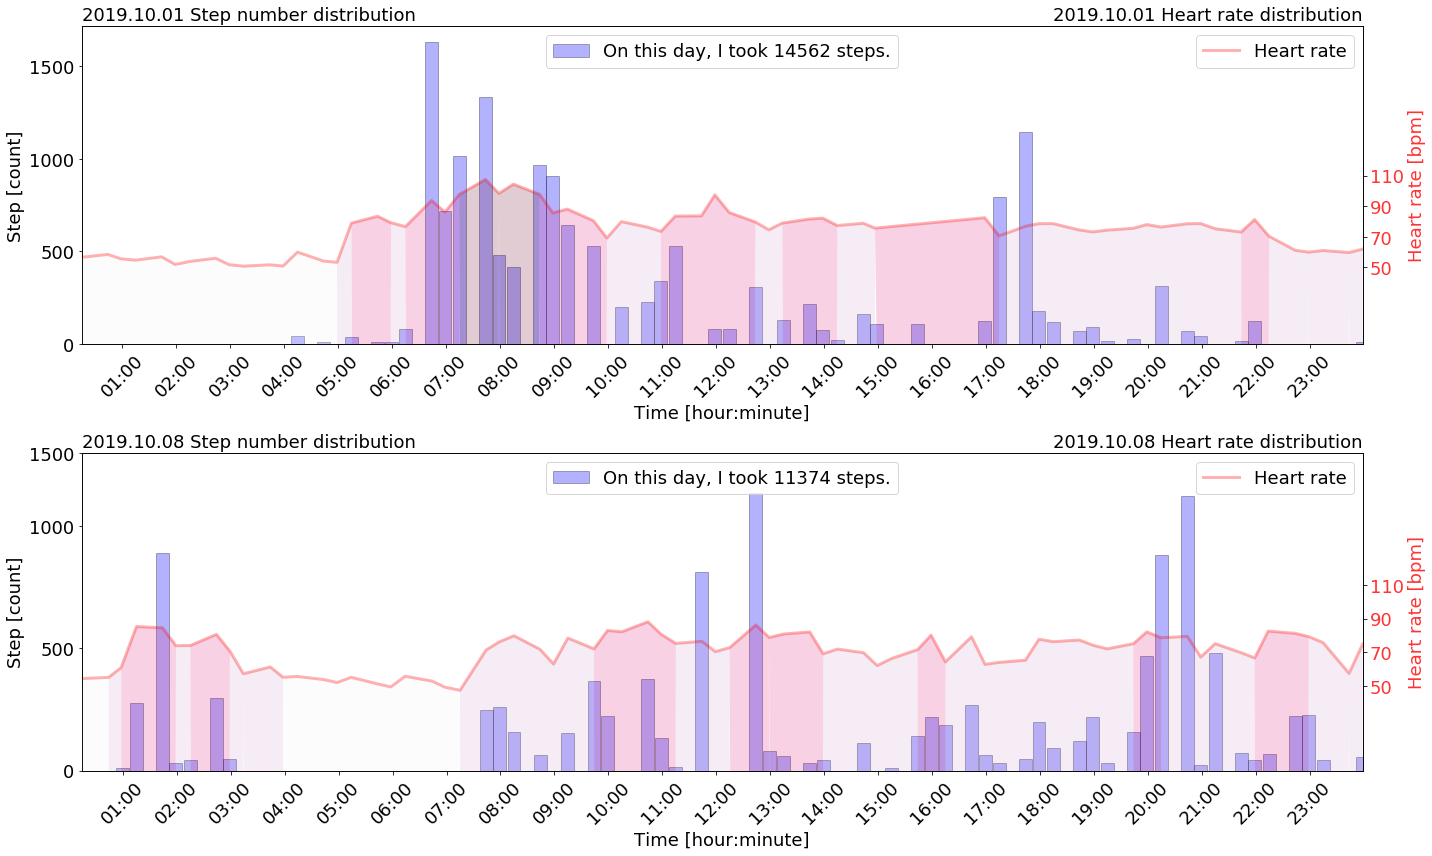

In [26]:
fontsize = 18

fig, (ax1,ax3) = plt.subplots(nrows=2, ncols=1, figsize=(20, 12))
ax1.bar(before_baby_steps_Tstamp_x1,before_baby_steps_y1,
        width=0.01,color = 'blue',edgecolor='black',alpha=0.3,
        label="On this day, I took {} steps.".format(sum(before_baby_steps_y1)))
ax1.set_title('2019.10.01 Step number distribution',loc='left',fontsize = fontsize)
ax1.set_ylabel('Step [count]',fontsize = fontsize)
ax1.set_xlabel('Time [hour:minute]',fontsize = fontsize)

ax1.legend(loc='upper center',fontsize = fontsize)
ax1.set_xticks(ticks=before_baby_xticks)
ax1.set_xticklabels(before_baby_xtick_labels,fontsize = fontsize,rotation=45)
ax1.set_yticks(ticks=before_baby_yticks)
ax1.set_yticklabels(before_baby_ytick_labels,fontsize = fontsize,rotation=0)
ax2 = ax1.twinx()
"""Such axes are generated by calling the Axes.twinx method. 
Likewise, Axes.twiny is available to generate axes that share a y axis but have different top and bottom scales."""

ax2.plot(before_baby_heartrate_Tstamp_x1,before_baby_heartrate_hr_y1,color = 'red',
         label="Heart rate",alpha=0.3,linewidth=3)
ax2.set_title('2019.10.01 Heart rate distribution',loc='right',fontsize = fontsize)
ax2.set_ylabel('Heart rate [bpm]',fontsize = fontsize,color='red',alpha=0.8)
ax2.set_xlabel('Time [hour:minute]',fontsize = fontsize)

ax2.legend(loc='upper right',fontsize = fontsize)
ax2.set_xticks(ticks=before_baby_xticks)
ax2.set_xticklabels(before_baby_xtick_labels)
ax2.set_yticks(ticks=before_baby_heartrate_yticks)
ax2.set_yticklabels(before_baby_heartrate_ytick_labels,fontsize = fontsize,rotation=0,color='red',alpha=0.8)

ax2.set_xlim(left=min(before_baby_heartrate_Tstamp_x1), right = max(before_baby_heartrate_Tstamp_x1))
ax2.set_ylim(bottom=0, top=100 + max(before_baby_heartrate_hr_y1))
#bins = np.linspace(start=40,stop=125,num = 20)
bins = [0,60,80,100,125]
state = pd.cut(pd.DataFrame(before_baby_heartrate_hr_y1).hr, bins=bins,labels=range(len(bins)-1))
cmap = plt.get_cmap('PuRd') #https://matplotlib.org/2.0.1/examples/color/colormaps_reference.html
for i, color in enumerate(cmap(np.linspace(start=0,stop=1,num = len(bins)-1))):
    ax2.fill_between(before_baby_heartrate_Tstamp_x1, before_baby_heartrate_hr_y1, -5000,
                     where=state==i,facecolor=color,interpolate=True,alpha=0.2)
    
    

ax3.bar(after_baby_steps_Tstamp_x1,after_baby_steps_y1,width=0.01,color="blue",
        edgecolor='black',alpha = 0.3,
        label="On this day, I took {} steps.".format(sum(after_baby_steps_y1)))

ax3.set_title('2019.10.08 Step number distribution',loc='left',fontsize = fontsize)
ax3.set_ylabel('Step [count]',fontsize = fontsize)
ax3.set_xlabel('Time [hour:minute]',fontsize = fontsize)   
ax3.set_xticks(ticks=after_baby_xticks)
ax3.set_xticklabels(after_baby_xtick_labels,fontsize = fontsize,rotation=45)
ax3.set_yticks(ticks=after_baby_yticks)
ax3.set_yticklabels(after_baby_ytick_labels,fontsize = fontsize,rotation=0)

ax3.legend(loc='upper center',fontsize = fontsize)

ax4 = ax3.twinx()
"""Such axes are generated by calling the Axes.twinx method. 
Likewise, Axes.twiny is available to generate axes that share a y axis but have different top and bottom scales."""

ax4.plot(after_baby_heartrate_Tstamp_x1,after_baby_heartrate_hr_y1,color = 'red',linewidth=3,
         label="Heart rate",alpha=0.3)
ax4.set_title('2019.10.08 Heart rate distribution',loc='right',fontsize = fontsize)
ax4.set_ylabel('Heart rate [bpm]',fontsize = fontsize,color='red',alpha=0.8)
ax4.set_xlabel('Time [hour:minute]',fontsize = fontsize)

ax4.legend(loc='upper right',fontsize = fontsize)
ax4.set_xticks(ticks=after_baby_xticks)
ax4.set_xticklabels(after_baby_xtick_labels,fontsize = fontsize)
ax4.set_yticks(ticks=after_baby_heartrate_yticks)
ax4.set_yticklabels(after_baby_heartrate_ytick_labels,fontsize = fontsize,rotation=0,color='red',alpha=0.8)


ax4.set_xlim(left=min(after_baby_heartrate_Tstamp_x1), right = max(after_baby_heartrate_Tstamp_x1))
ax4.set_ylim(bottom=0, top=100 + max(after_baby_heartrate_hr_y1))
#ax4.set_xticks(ticks=after_baby_xticks)
#ax4.set_yticklabels([y.get_text() for y in ax4.get_yticklabels()], rotation=0, fontsize=fontsize)

bins = np.linspace(start=40,stop=125,num = 20)
bins = [0,60,80,100,125]
state = pd.cut(pd.DataFrame(after_baby_heartrate_hr_y1).hr, bins=bins,labels=range(len(bins)-1))
cmap = plt.get_cmap('PuRd')
for i, color in enumerate(cmap(np.linspace(start=0,stop=1,num = len(bins)-1))):
    #print(i)
    ax4.fill_between(after_baby_heartrate_Tstamp_x1, after_baby_heartrate_hr_y1, -5000,
                     where=state==i,facecolor=color,interpolate=True,alpha=0.2)
fig.tight_layout()
plt.savefig("common_steps_hr.jpg")
plt.plot()